# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [123]:
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub



# Downloading Data

In [124]:

# this returns the path to the downloaded file or folder
downloaded = kagglehub.dataset_download("udaymalviya/bank-loan-data")

# Suppose `downloaded` is a folder or zip inside a cache directory
# you can move it to your `data/` folder:
os.makedirs("data", exist_ok=True)

# If it's a zip file:
if downloaded.endswith(".zip"):
    import zipfile
    with zipfile.ZipFile(downloaded, "r") as z:
        z.extractall("data")
else:
    # if it's a folder, just copy
    shutil.copytree(downloaded, "data", dirs_exist_ok=True)


# Loading datasets

In [125]:
df = pd.read_csv("data/loan_data.csv")
df.head(10)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
6,26.0,female,Bachelor,93471.0,1,RENT,35000.0,EDUCATION,12.42,0.37,3.0,701,No,1
7,24.0,female,High School,95550.0,5,RENT,35000.0,MEDICAL,11.11,0.37,4.0,585,No,1
8,24.0,female,Associate,100684.0,3,RENT,35000.0,PERSONAL,8.90,0.35,2.0,544,No,1
9,21.0,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,No,1


# Describing the data

In [126]:
df.shape

(45000, 14)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [128]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [129]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [130]:
df['loan_intent'].value_counts()

loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64

In [159]:
df['person_gender'].value_counts()

person_gender
male      24841
female    20159
Name: count, dtype: int64

In [132]:
df['person_education'].value_counts()

person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64

In [133]:
# Age buckets

bins = [0,10,20,30,40,50,60,70,80,90,100]
labels = ['0–10','11–20','21–30','31–40','41–50','51–60','61–70','71–80','81–90','91–100']

df['age_bucket'] = pd.cut(df['person_age'], bins=bins, labels=labels, right=False)
print(df['age_bucket'].value_counts().sort_index())


age_bucket
0–10          0
11–20         0
21–30     32378
31–40     10434
41–50      1804
51–60       290
61–70        72
71–80        12
81–90         2
91–100        1
Name: count, dtype: int64


In [134]:
df['loan_amnt'].mean()


np.float64(9583.157555555556)

In [135]:
# Count of loan with loan_amount >  mean(loan_amount )
df['loan_amnt'][df['loan_amnt'] > df['loan_amnt'].mean()].count()


np.int64(19474)

In [136]:
df['loan_amnt'].max()

np.float64(35000.0)

In [137]:
df['loan_amnt'].min()

np.float64(500.0)

In [138]:
# loan_amount_buckets

bins = [0,5000,10000,15000,20000,25000,30000,35000,40000,45000]
labels = ['0 - 5000','5001 - 10000','10001 - 15000','15001 - 20000','20001 - 25000','25001 - 30000','30001 - 35000','35001 - 40000','40001 - 45000']
df['loan_amnt_bucket'] = pd.cut(df['loan_amnt'], bins=bins, labels=labels, right=False)
df['loan_amnt_bucket'].value_counts()

loan_amnt_bucket
5001 - 10000     15780
0 - 5000         10344
10001 - 15000    10017
15001 - 20000     4482
20001 - 25000     2686
25001 - 30000     1278
35001 - 40000      234
30001 - 35000      179
40001 - 45000        0
Name: count, dtype: int64

In [139]:
avg_loan_by_intent = df.groupby('loan_intent')['loan_amnt'].mean().sort_values(ascending=False)
avg_loan_by_intent

loan_intent
HOMEIMPROVEMENT      10419.187330
VENTURE               9658.897429
PERSONAL              9603.918432
DEBTCONSOLIDATION     9548.333660
EDUCATION             9507.405987
MEDICAL               9137.959172
Name: loan_amnt, dtype: float64

In [140]:
avg_loan_by_education = df.groupby('person_education')['loan_amnt'].mean().sort_values(ascending=False)
avg_loan_by_education

person_education
Doctorate      9930.932367
Associate      9627.988942
Master         9595.030229
Bachelor       9556.113068
High School    9543.422987
Name: loan_amnt, dtype: float64

In [141]:
df['person_income'].value_counts()


person_income
8000.0     15
73011.0    10
36995.0     9
37020.0     8
60914.0     8
           ..
16720.0     1
29547.0     1
64117.0     1
89930.0     1
42960.0     1
Name: count, Length: 33989, dtype: int64

In [142]:
df['person_income'].max()

np.float64(7200766.0)

In [143]:
l = df['person_income'].unique()
print(l)

[71948. 12282. 12438. ... 31924. 56942. 33164.]


In [144]:
df['person_income'].max()

np.float64(7200766.0)

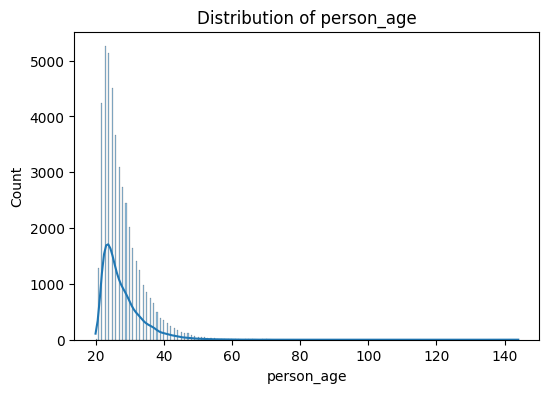

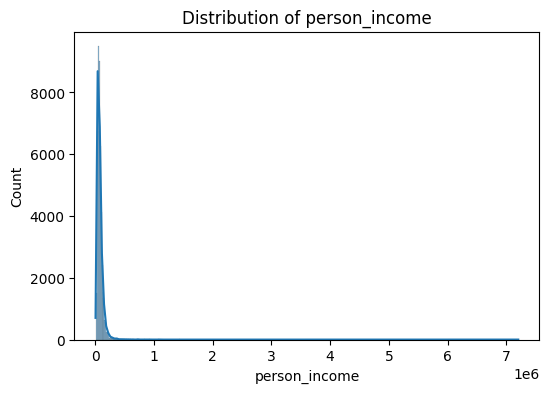

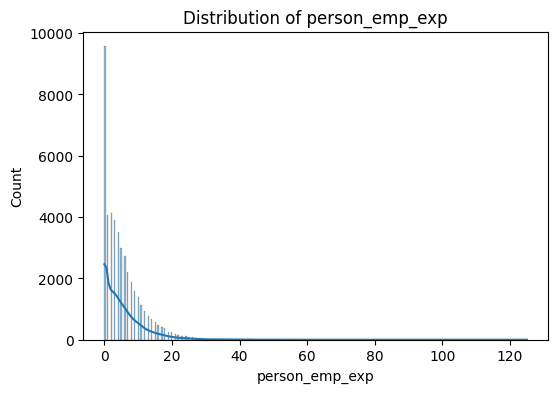

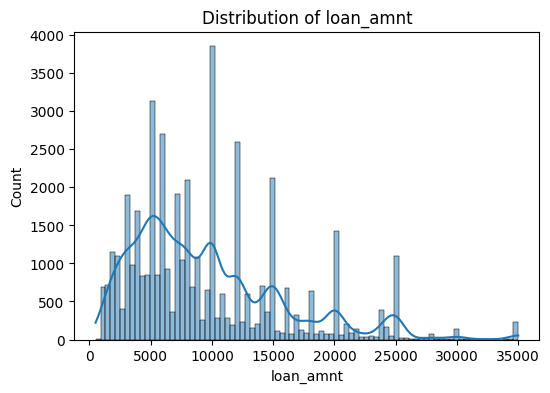

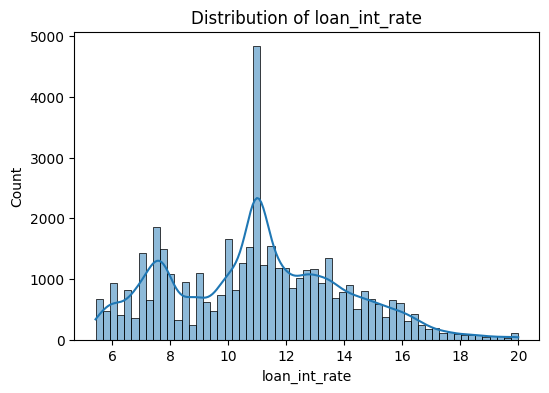

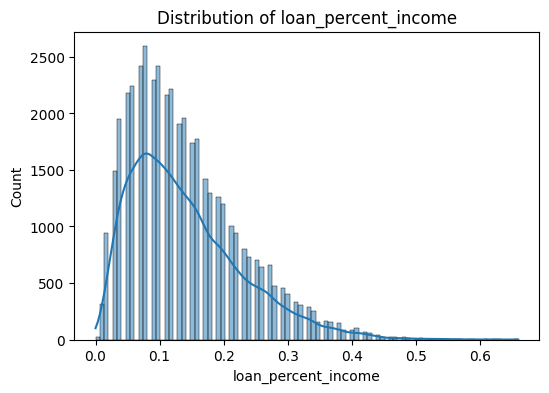

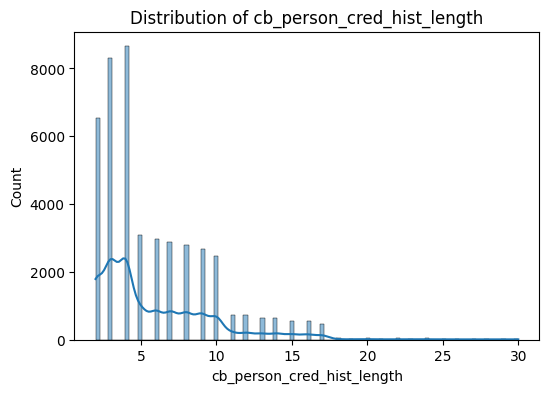

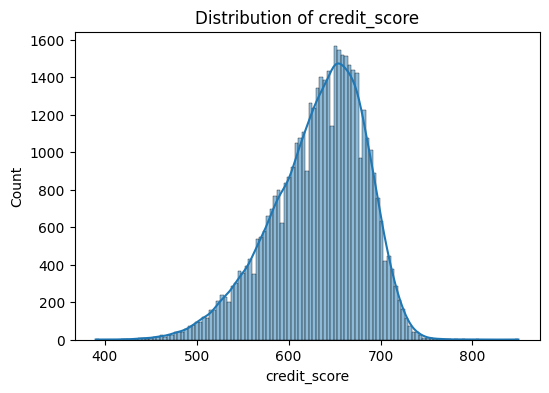

In [145]:

numerical_features = [
    'person_age', 'person_income', 'person_emp_exp',
    'loan_amnt', 'loan_int_rate', 'loan_percent_income',
    'cb_person_cred_hist_length', 'credit_score'
]

for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


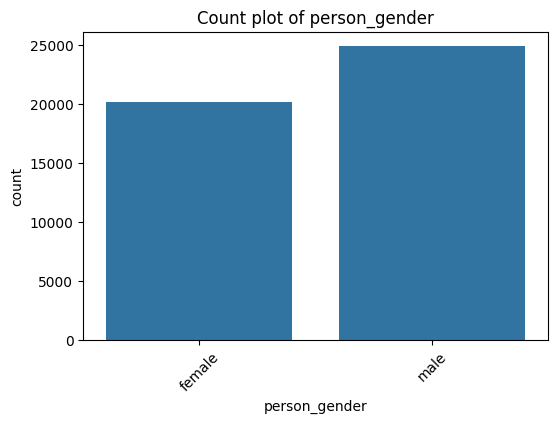

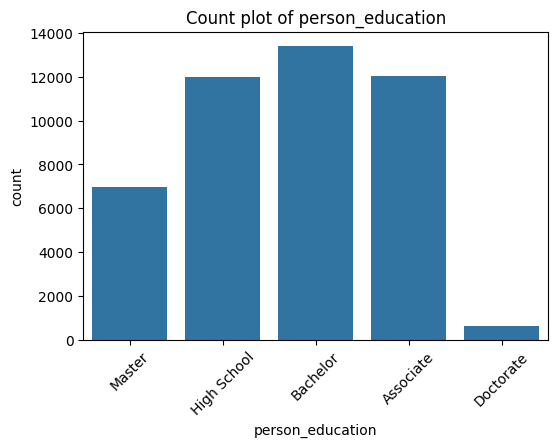

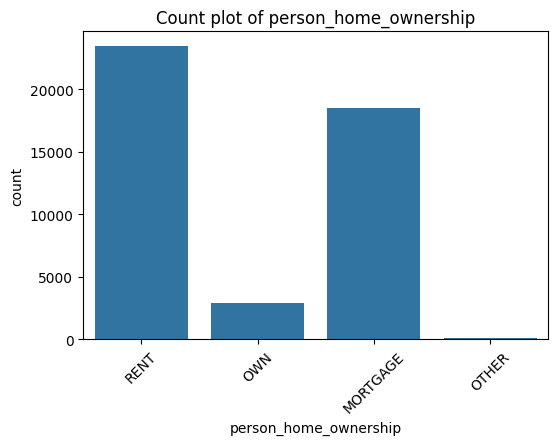

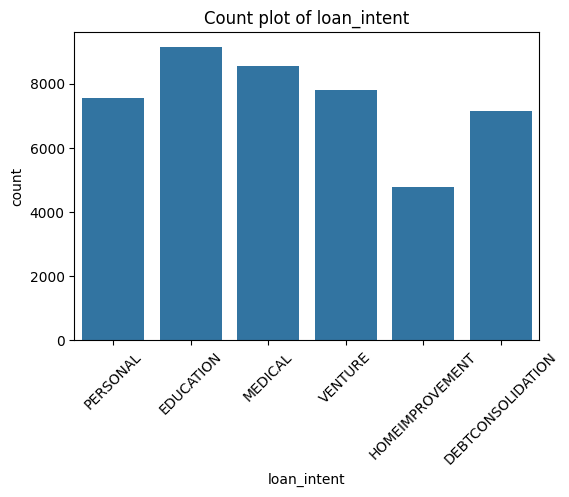

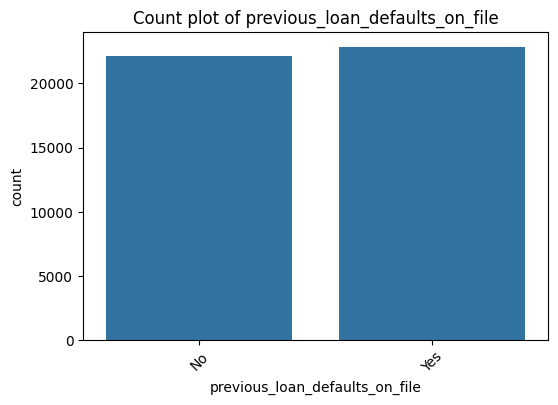

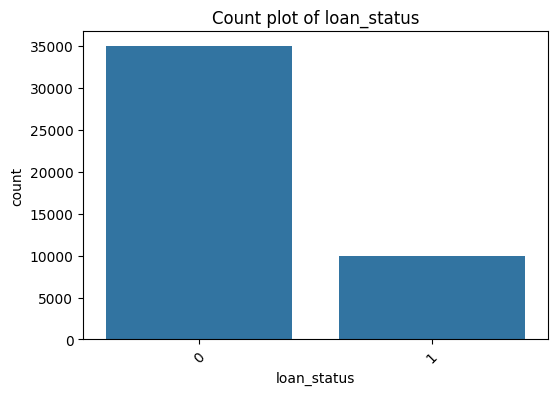

In [146]:
categorical_features = [
    'person_gender', 'person_education', 'person_home_ownership',
    'loan_intent', 'previous_loan_defaults_on_file', 'loan_status'
]

for col in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col])
    plt.title(f'Count plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

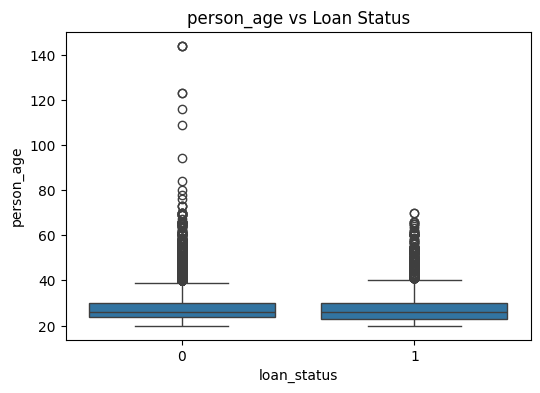

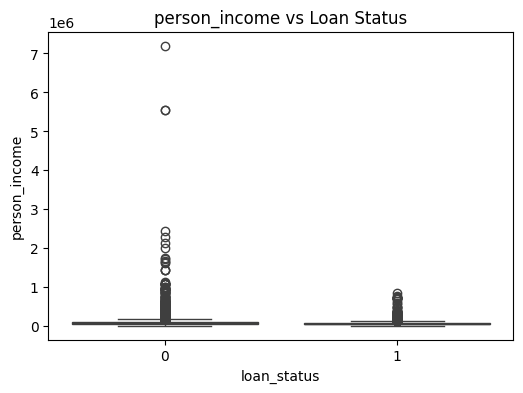

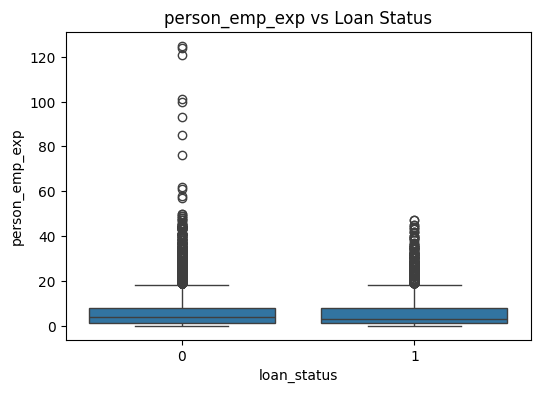

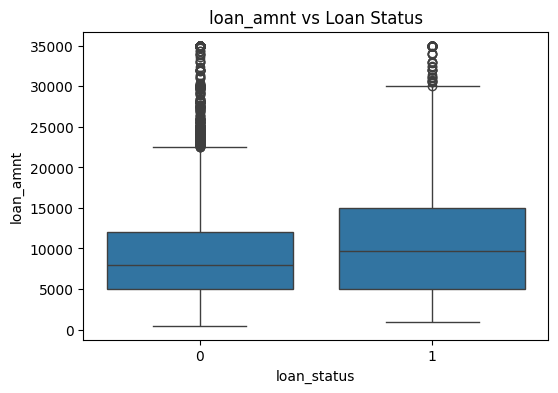

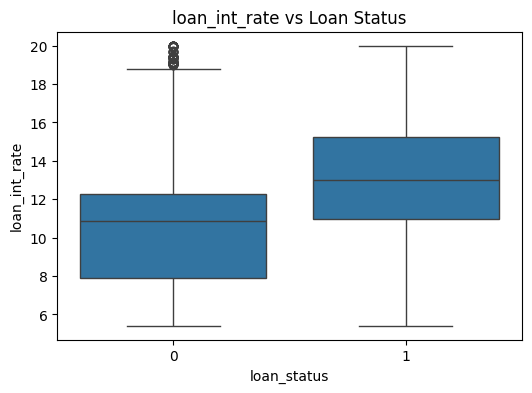

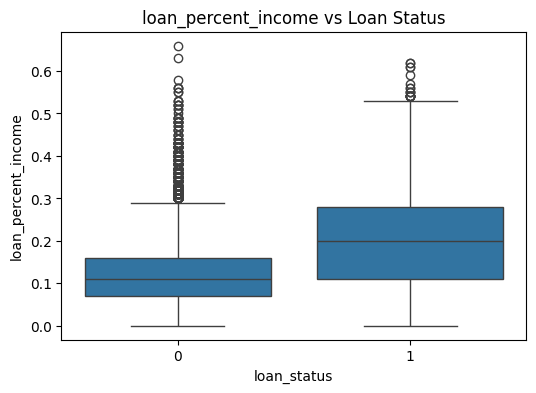

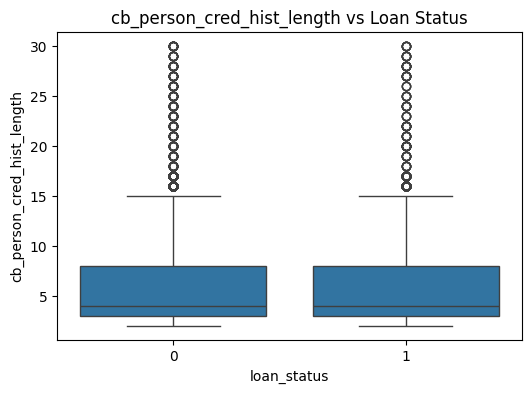

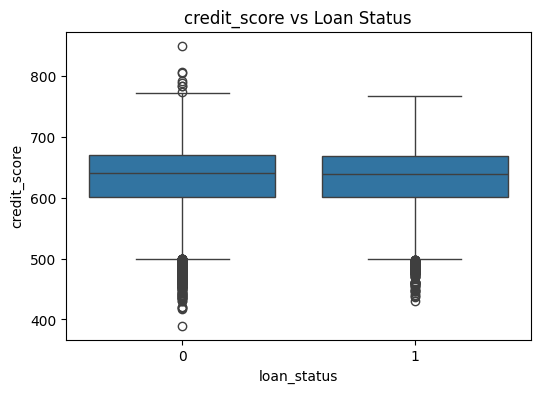

In [147]:
for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='loan_status', y=col, data=df)
    plt.title(f'{col} vs Loan Status')
    plt.show()

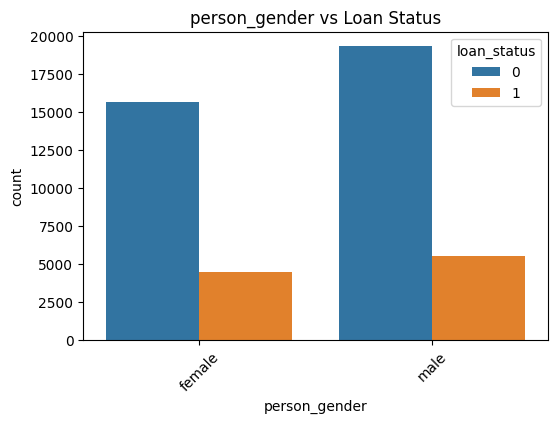

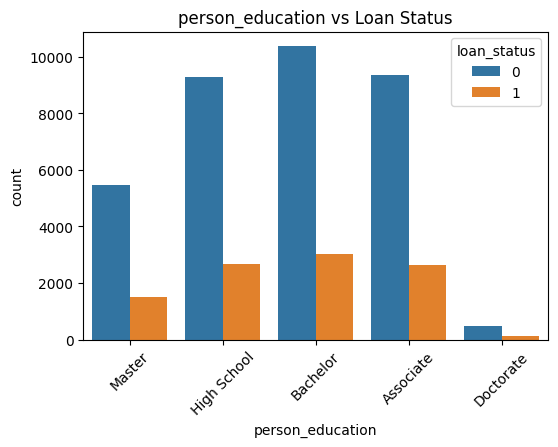

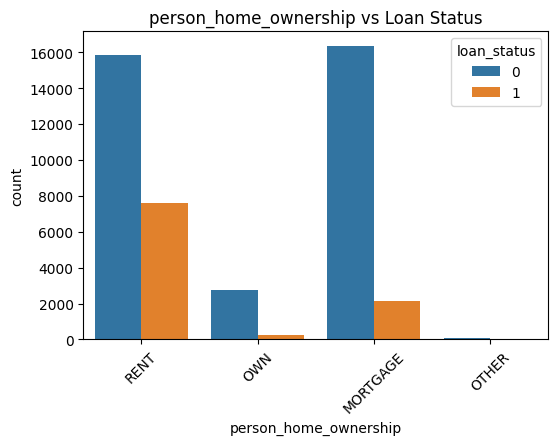

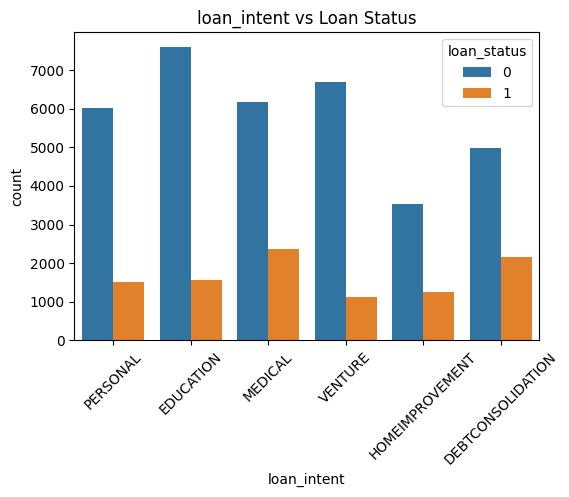

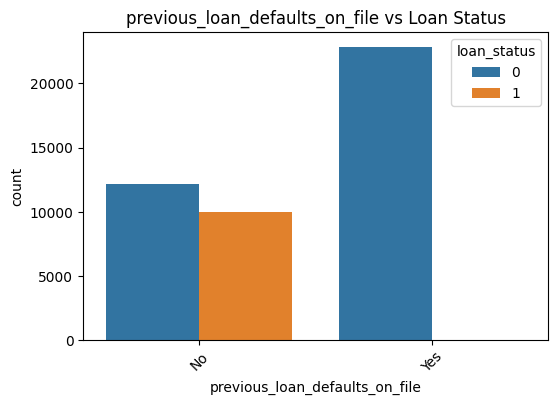

In [148]:
for col in categorical_features:
    if col != 'loan_status':
        plt.figure(figsize=(6, 4))
        sns.countplot(x=col, hue='loan_status', data=df)
        plt.title(f'{col} vs Loan Status')
        plt.xticks(rotation=45)
        plt.show()

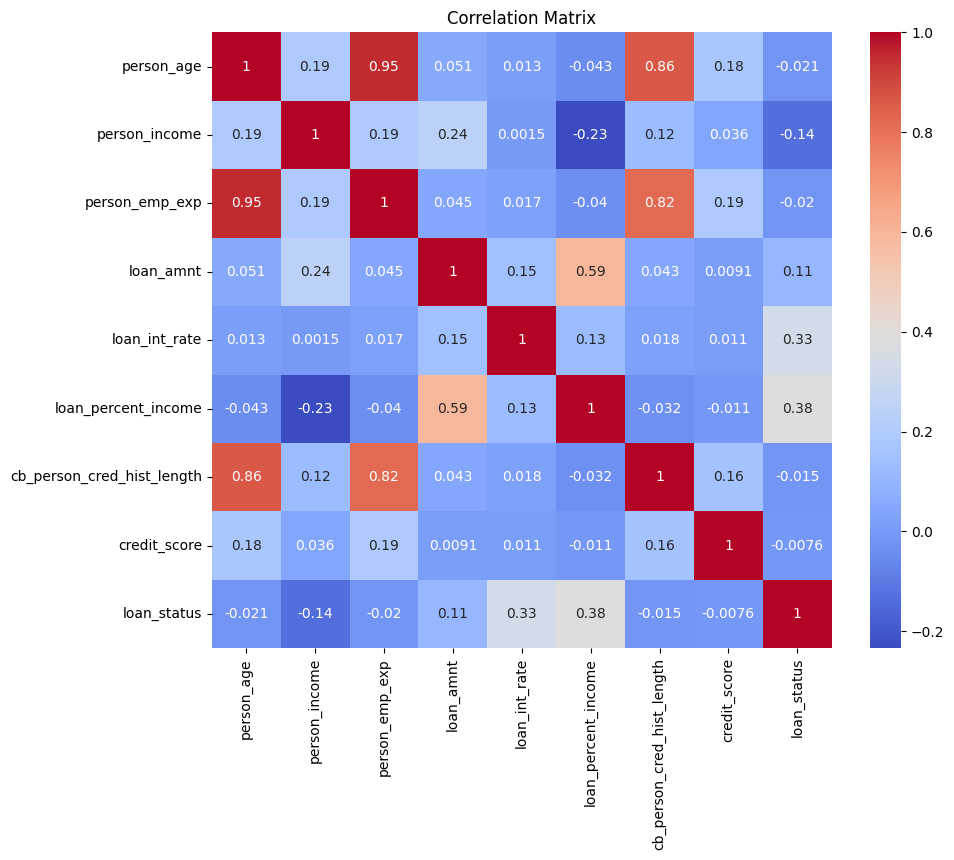

In [149]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [150]:
df['loan_status'].value_counts(normalize=True)

loan_status
0    0.777778
1    0.222222
Name: proportion, dtype: float64

## Preprocessing

In [165]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Step 1: Split your original DataFrame
X = df.drop('loan_status', axis=1)
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Step 2: Identify non-numeric columns
non_numeric_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Step 3: Combine train and test for consistent encoding
combined = pd.concat([X_train, X_test], axis=0)

# Step 4: One-hot encode non-numeric columns
combined_encoded = pd.get_dummies(combined, columns=non_numeric_cols, drop_first=True)

# Step 5: Split back into train and test
X_train_encoded = combined_encoded.iloc[:len(X_train), :].copy()
X_test_encoded = combined_encoded.iloc[len(X_train):, :].copy()



In [166]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_encoded, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [169]:
# Predict loan status for test set
y_pred = model.predict(X_test_encoded)

# Evaluate performance
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.98      0.96      7000
           1       0.91      0.76      0.83      2000

    accuracy                           0.93      9000
   macro avg       0.92      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000

[[6844  156]
 [ 476 1524]]
